# Three body Kepler problem
Let $q,p\in \mathbb R^3$ and consider the following Hamiltonian

$$H(q,p)=\frac{1}{2}(p_1^2+p_2^2+p_3^2)-\frac{\mu}{\sqrt{q_1^2+q_2^2+q_3^2}}.$$

The corresponding Hamiltonian system is given by

\begin{align*}
\dot q_i&=p_i\\
\dot p_i&=-\mu\frac{q_i}{(q_1^2+q_2^2+q_3^2)^{3/2}},\quad i=1,2,3\\
\end{align*}

# Conserved quantities

1. The Hamiltonian function $H(q,p)$
2. The angular momentum vector $L=q\times p= (q_2p_3-q_3p_2,\
q_3p_1-q_1p_3,\ q_1p_2-q_2p_1)^\top$

# Initial data

$$\mu =1,\qquad q_0 = (0.8,\ 0.6 ,\ 0),\qquad  p_0=(0 ,\ 1 ,\ 0.5)$$


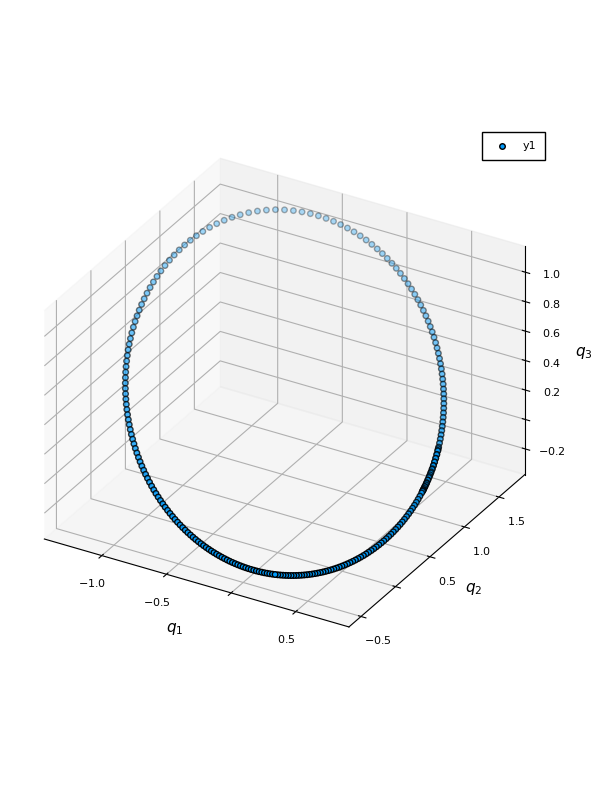

In [352]:
# Benchmark solution 

using OrdinaryDiffEq, Plots, LaTeXStrings
function Kepler3d!(ydot,y,p,t)
 ydot[1] = y[4]
 ydot[2] = y[5]
 ydot[3] = y[6]
 ydot[4] = -y[1]/(y[1]^2+y[2]^2+y[3]^2)^(3/2)
 ydot[5] = -y[2]/(y[1]^2+y[2]^2+y[3]^2)^(3/2)
 ydot[6] = -y[3]/(y[1]^2+y[2]^2+y[3]^2)^(3/2)  
end

y₀ = [0.8 ; 0.6 ; 0 ; 0 ; 1 ; 0.5]
tspan = (0.0,10.0)
prob = ODEProblem(Kepler3d!,y₀,tspan)
sol = solve(prob,Tsit5(),reltol=1e-10,abstol=1e-10)

s_exact = stack(sol.u, dims=2)'

scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3],xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3",framestyle= :origin)

# Invariants

In [353]:
using LinearAlgebra

H(q::Vector,p::Vector) = (1/2)*p'*p - 1/norm(q);

L(q::Vector,p::Vector) = cross(q,p);

RL(q::Vector,p::Vector) = cross(p,cross(q,p))-q/norm(q);

In [355]:
# fKepler = vector field

function fKepler(y)
r=(y[1]^2+y[2]^2+y[3]^2)^(3/2);
return Ydot = [y[4] , y[5], y[6] , -y[1]/r, -y[2]/r, -y[3]/r];
end

# fKeplerT = vector field to kinitic energy


function fKeplerT(p)
    
return Qdot = [p[1] , p[2] , p[3]];

end

# fKeplerV = vector field to potentioal energy


function fKeplerV(q)
    
r = (√(q'*q))^3;
    
return Pdot = [-q[1]/r , -q[2]/r , -q[3]/r];
    
end

fKeplerV (generic function with 1 method)

# Explicit Euler 

In [356]:
function  eulerE(f::Function,T,x₀,N)
h = T/N; x=[] ; push!(x,x₀); 
for i in 1:N; 
  x₀ = x₀ + h * f(x₀);
  push!(x,x₀)
end
    return stack(x,dims=2)'; 
end

eulerE (generic function with 1 method)

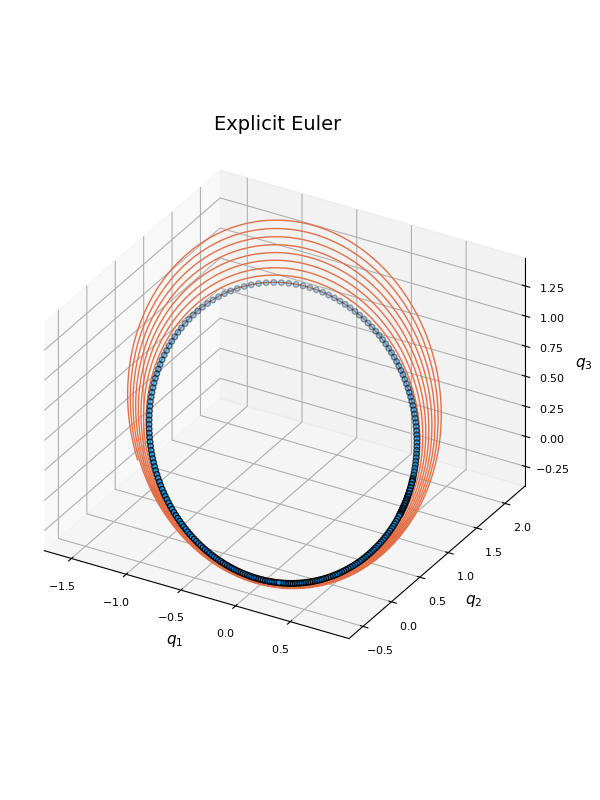

In [357]:
T=100;   N=100000;   t1 = (0:N)*T/N;

x₀ = [0.8 , 0.6 , 0 , 0 , 1 , 0.5];

s = eulerE(fKepler,T,x₀,N)

q1 = s[:,1:3]
p1 = s[:,4:6]

gr(size=(600,800)); pyplot()

scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q1[:,1],q1[:,2],q1[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "Explicit Euler", legend=false,framestyle = :o)

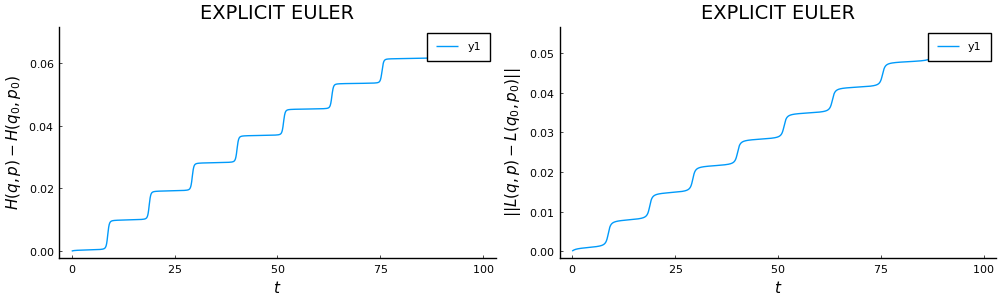

In [362]:
gr(size=(1000,300)); pyplot()

H1=[H(q1[i,:],p1[i,:]) for i in 1:N+1];
L1=[L(q1[i,:],p1[i,:]) for i in 1:N+1];
errL1 = [norm(L1[i]-L1[1]) for i in 1:N+1];

plot1 = plot(t1, H1 .- H1[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t1,errL1 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")
plot(plot1,plot2, layout =(1, 2),title="EXPLICIT EULER")

# Implicit Euler 

In [363]:
function  eulerI(f::Function,T,x₀,N)
h = T / N; x=[] ; push!(x,x₀); 
    
tol = 1e-10;   K1 = f(x₀);
    
for i in 1:N

K1_0 = K1;   
        
while true        
        
 K1 = f(x₀ + h * K1_0);
            
if norm(K1-K1_0) < tol 
break
end
 K1_0=K1; 
end
            
x₀ = x₀ + h * K1;  
        
  push!(x,x₀);
        
end
    return stack(x, dims=2)'; 
end

eulerI (generic function with 1 method)

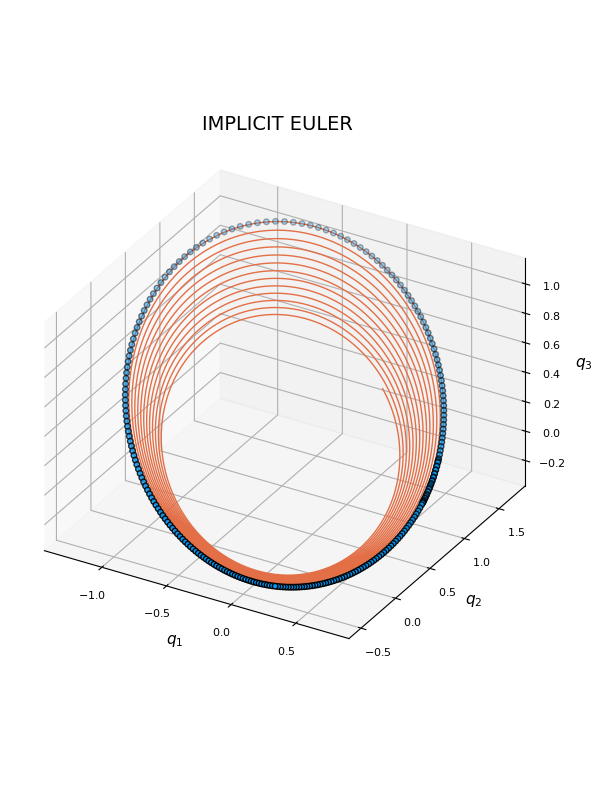

In [364]:
T=100;   N=100000;  t2 = (0:N)*T/N;


s = eulerI(fKepler,T,x₀,N)

q2 = s[:,1:3]
p2 = s[:,4:6]

gr(size=(600,800)); pyplot()


scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q2[:,1],q2[:,2],q2[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "IMPLICIT EULER", leg=false)

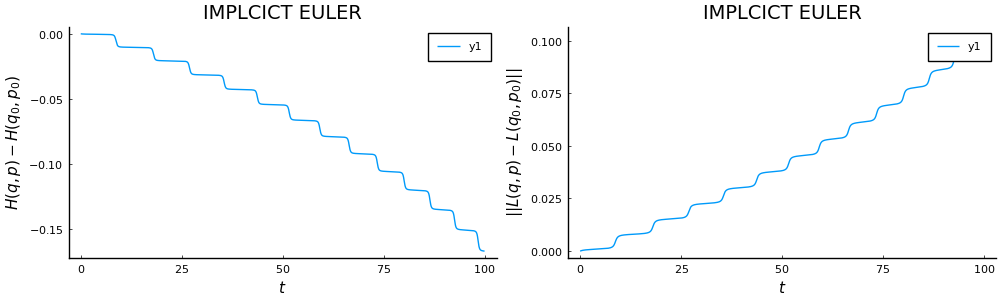

In [365]:
gr(size=(1000,300)); pyplot()

H2=[H(q2[i,:],p2[i,:]) for i in 1:N+1]
L2=[L(q2[i,:],p2[i,:]) for i in 1:N+1]
errL2 = [norm(L2[i]-L2[1]) for i in 1:N+1]

plot1 = plot(t2, H2 .- H2[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t2, errL2 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")

plot(plot1,plot2, layout =(1, 2),title="IMPLCICT EULER")

# Symplectic Euler

In [366]:
function  eulerTV(fT,fV,T,q₀,p₀,N)
 h = T/N;
    
q=[] ; push!(q,q₀);  p=[] ; push!(p,p₀); q₁ = q₀; p₁ = p₀; 
    
 for i=1:N;
   q₁ = q₁ + h * fT(p₁);
   p₁ = p₁ + h * fV(q₁);
   push!(q,q₁);
   push!(p,p₁);
 end
  return stack(q, dims=2)', stack(p, dims=2)'; 
end

eulerTV (generic function with 1 method)

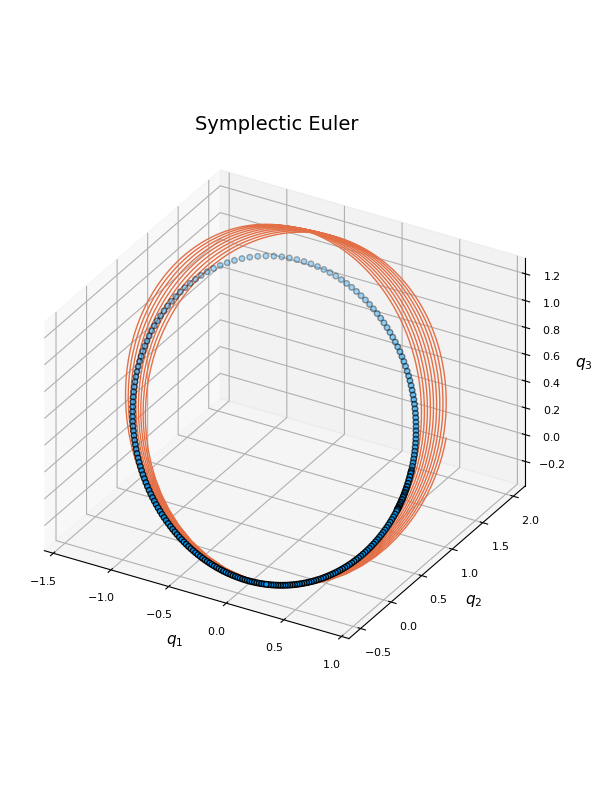

In [367]:
T=100;   N=1000;  t3 = (0:N)*T/N;

q₀=[x₀[1], x₀[2], x₀[3]];  p₀=[x₀[4], x₀[5], x₀[6]]; 

s1,s2=eulerTV(fKeplerT,fKeplerV,T,q₀,p₀,N);

q3 = s1[:,1:3]
p3 = s2[:,1:3]

gr(size=(600,800)); pyplot(grid=:none)


scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q3[:,1],q3[:,2],q3[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "Symplectic Euler", legend=false)

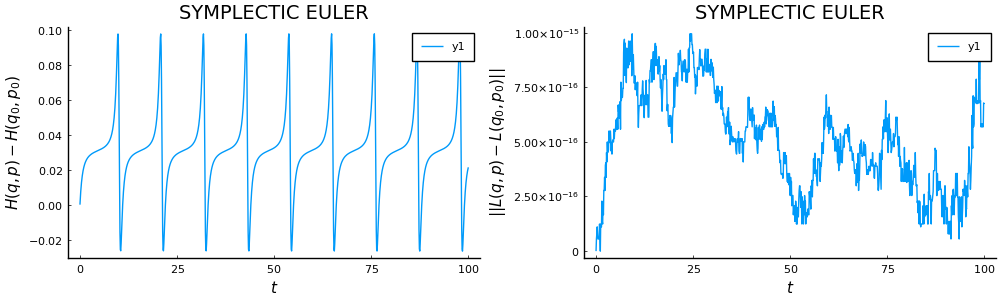

In [368]:
gr(size=(1000,300)); pyplot()

H3=[H(q3[i,:],p3[i,:]) for i in 1:N+1]
L3=[L(q3[i,:],p3[i,:]) for i in 1:N+1]
errL3 = [norm(L3[i]-L3[1]) for i in 1:N+1]

plot1 = plot(t3, H3 .- H3[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t3, errL3 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")
plot(plot1,plot2, layout =(1, 2),title="SYMPLECTIC EULER")

# Störmer–Verlet

In [369]:
function  Stormer_Verlet(fT,fV,T,q₀,p₀,N)
    
h = T/N; q=[] ; push!(q,q₀);  p=[] ; push!(p,p₀); q₁ = q₀; p₁ = p₀; 
    
 for i=1:N;
    q̄ = q₁ + (h/2) * fT(p₁);
   p₁ = p₁ + h * fV(q̄);    
   q₁ = q̄ + (h/2) * fT(p₁);
   
   push!(q,q₁);
   push!(p,p₁);
 end
  return  stack(q, dims=2)', stack(p, dims=2)'; 
end

Stormer_Verlet (generic function with 2 methods)

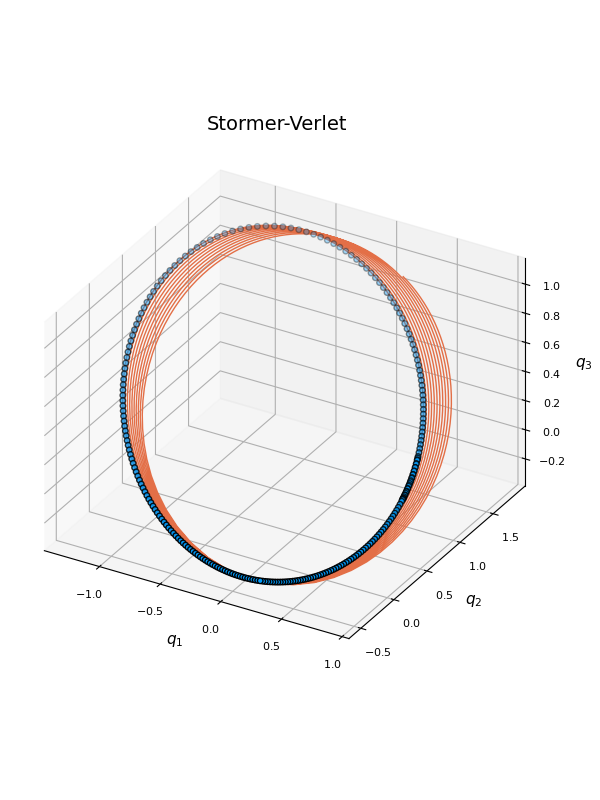

In [370]:
T=100;   N=1000;  t4 = (0:N)*T/N;

s1,s2 = Stormer_Verlet(fKeplerT,fKeplerV,T,q₀,p₀,N);

q4 = s1[:,1:3];
p4 = s2[:,1:3];

gr(size=(600,800)); pyplot()

scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q4[:,1],q4[:,2],q4[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "Stormer-Verlet", legend=false)

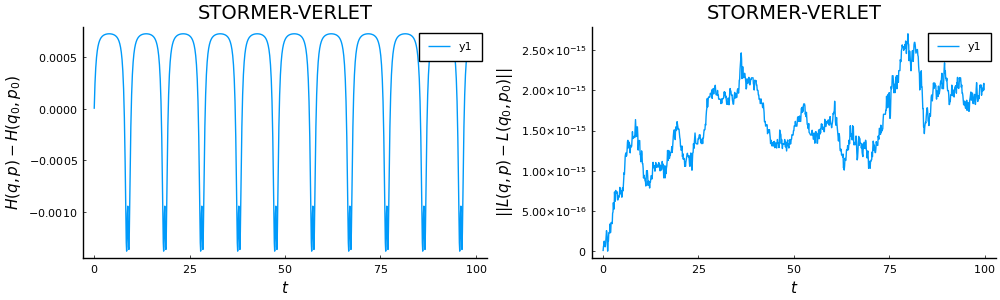

In [371]:
gr(size=(1000,300)); pyplot()

H4=[H(q4[i,:],p4[i,:]) for i in 1:N+1];
L4=[L(q4[i,:],p4[i,:]) for i in 1:N+1];
errL4 = [norm(L4[i]-L4[1]) for i in 1:N+1];

plot1 = plot(t4, H4 .- H4[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t4, errL4 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")
plot(plot1,plot2, layout =(1, 2),title="STORMER-VERLET")

# Lobatto IIIA - IIIB 

In [372]:
function  Lobatto_IIIA_IIIB(fV::Function,fT::Function,T,x₀,y₀,N)
    
h = T / N; x=[] ; push!(x,x₀); y=[] ; push!(y,y₀);

tol = 1e-12;    
    
a = [0  0  0 ; 5/24  1/3  -1/24 ; 1/6  2/3  1/6];   
â = [1/6  -1/6  0 ; 1/6 1/3  0 ; 1/6  5/6  0];    

b = [1/6 , 2/3 , 1/6] ;   

    
K1 = fV(y₀); 
L1 = fT(x₀);  
    
K2 = K1 ;  K3 = K1 ; L2 = L1 ; L3 = L1;
    
for i in 1:N;

K1_0 = K1;    K2_0 = K2; K3_0 = K3;
L1_0 = L1;    L2_0 = L2; L3_0 = L3;

while true        
        
K1 = fV(y₀+h*(â[1,1]*L1_0+â[1,2]*L2_0+â[1,3]*L3_0));
L1 = fT(x₀+h*(a[1,1]*K1_0+a[1,2]*K2_0+a[1,3]*K3_0));

K2 = fV(y₀+h*(â[2,1]*L1_0+â[2,2]*L2_0+â[2,3]*L3_0));
L2 = fT(x₀+h*(a[2,1]*K1_0+a[2,2]*K2_0+a[2,3]*K3_0));

K3 = fV(y₀+h*(â[3,1]*L1_0+â[3,2]*L2_0+â[3,3]*L3_0));
L3 = fT(x₀+h*(a[3,1]*K1_0+a[3,2]*K2_0+a[3,3]*K3_0));

if norm(K1-K1_0)+norm(K2-K2_0) + norm(K3-K3_0) < tol && norm(L1-L1_0)+norm(L2-L2_0) + norm(L3-L3_0) < tol; 
break; 
end
            
K1_0 = K1;    K2_0 = K2; K3_0 = K3;
L1_0 = L1;    L2_0 = L2; L3_0 = L3;
            
end
            
x₀ = x₀ + h * ( b[1] * K1 + b[2] * K2 + b[3] * K3) ;  
y₀ = y₀ + h * ( b[1] * L1 + b[2] * L2 + b[3] * L3) ;  
        
  push!(x,x₀) ; push!(y,y₀);
end
    return stack(x, dims=2)', stack(y, dims=2)'; 
end


Lobatto_IIIA_IIIB (generic function with 1 method)

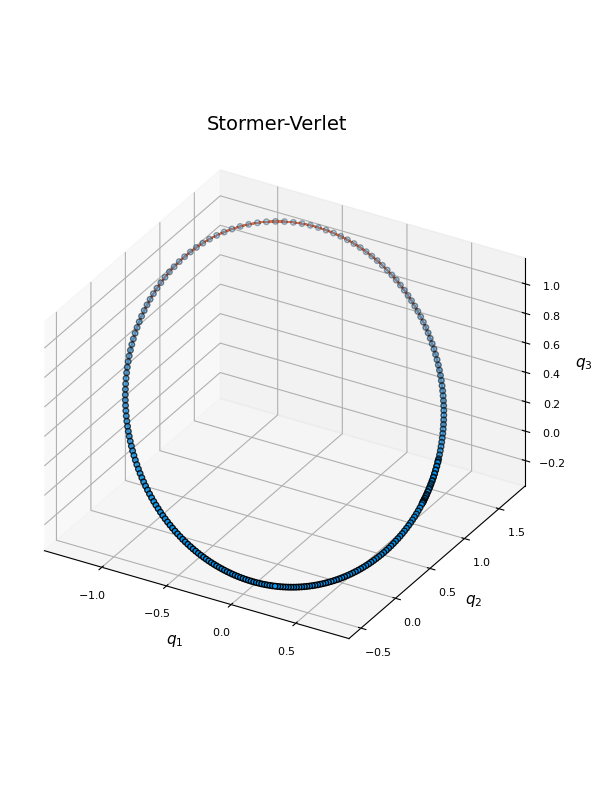

In [373]:
T=100;   N=1000;  t5 = (0:N)*T/N;

s1,s2 = Lobatto_IIIA_IIIB(fKeplerT,fKeplerV,T,q₀,p₀,N);

q5 = s1[:,1:3];
p5 = s2[:,1:3];

gr(size=(600,800)); pyplot()


scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q5[:,1],q5[:,2],q5[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "Stormer-Verlet", legend=false)

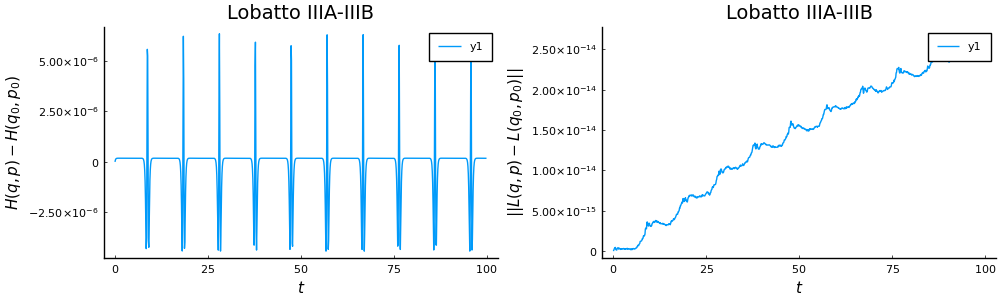

In [374]:
gr(size=(1000,300)); pyplot()

H5=[H(q5[i,:],p5[i,:]) for i in 1:N+1]
L5=[L(q5[i,:],p5[i,:]) for i in 1:N+1]
errL5 = [norm(L5[i]-L5[1]) for i in 1:N+1]

plot1 = plot(t5, H5 .- H5[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t5, errL5 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")
plot(plot1,plot2, layout =(1, 2),title="Lobatto IIIA-IIIB")

# Runge-Kotta order 4 (RK4)

In [375]:
function  RK4(f::Function,T,x₀,N)
h = T / N; x=[] ; push!(x,x₀);
for i in 1:N;
  K1 = f(x₀)     
  K2 = f(x₀ + h * K1 / 2);
  K3 = f(x₀ + h * K2 / 2);
  K4 = f(x₀ + h * K3);
x₀ = x₀ + h * (K1 + 2 * K2 + 2 * K3 + K4) / 6;  
  push!(x,x₀)
end
    return stack(x, dims=2)'; 
end

RK4 (generic function with 1 method)

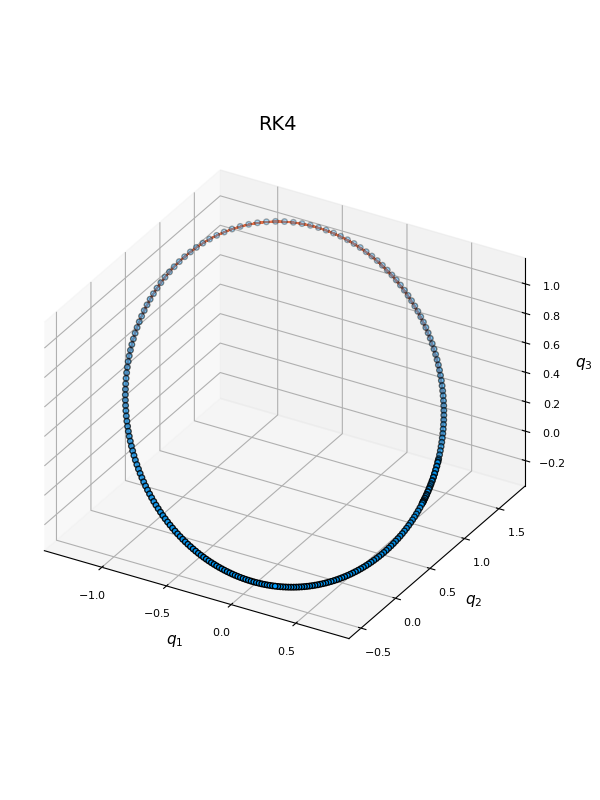

In [376]:
T=100;   N=1000;  t6 = (0:N)*T/N;

s = RK4(fKepler,T,x₀,N)

q6 = s[:,1:3];
p6 = s[:,4:6];


gr(size=(600,800)); pyplot()

scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q6[:,1],q6[:,2],q6[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "RK4", legend=false)

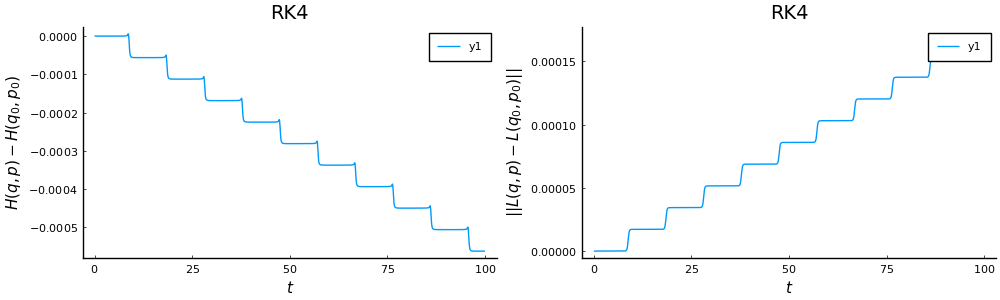

In [377]:
gr(size=(1000,300)); pyplot()

H6=[H(q6[i,:],p6[i,:]) for i in 1:N+1]
L6=[L(q6[i,:],p6[i,:]) for i in 1:N+1]
errL6 = [norm(L6[i]-L6[1]) for i in 1:N+1]

plot1 = plot(t6, H6 .- H6[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t6, errL6 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")
plot(plot1,plot2, layout =(1, 2),title="RK4") #plot_title="RK4"

# Composotition order 4 for Stormer Verlet

In [379]:
function  Compos_Stormer_Verlet(fT,fV,T,q₀,p₀,N)
    
h = T/N; q=[] ; push!(q,q₀);  p=[] ; push!(p,p₀); q₁ = q₀; p₁ = p₀; 

α = 1/(2-2^(1/3));
β = 2^(1/3)/(2^(1/3)-2);    
    
 for i=1:N;
        
    q̄ = q₁ + (α*h/2) * fT(p₁);
   p₁ = p₁ + α*h * fV(q̄);    
   q₁ = q̄ + (α*h/2) * fT(p₁);

    q̄ = q₁ + (β*h/2) * fT(p₁);
   p₁ = p₁ + β * h * fV(q̄);    
   q₁ = q̄ + (β * h/2) * fT(p₁);   

    q̄ = q₁ + (α*h/2) * fT(p₁);
   p₁ = p₁ + α*h * fV(q̄);    
   q₁ = q̄ + (α*h/2) * fT(p₁);    
   
   push!(q,q₁);
   push!(p,p₁);
 end
  return  stack(q, dims=2)', stack(p, dims=2)'; 
end

Compos_Stormer_Verlet (generic function with 1 method)

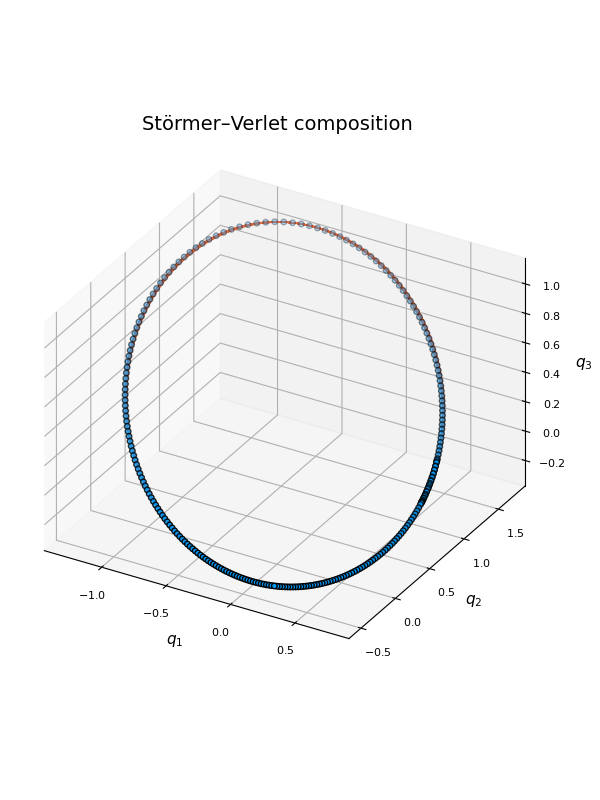

In [380]:
T=100;   N=1000;  t7 = (0:N)*T/N;


s1,s2 = Compos_Stormer_Verlet(fKeplerT,fKeplerV,T,q₀,p₀,N);

q7 = s1[:,1:3];
p7 = s2[:,1:3];

gr(size=(600,800)); pyplot()


scatter3d(s_exact[:,1],s_exact[:,2],s_exact[:,3])
plot3d!(q7[:,1],q7[:,2],q7[:,3])
plot3d!(xlabel = L"q_1", ylabel = L"q_2", zlabel = L"q_3", title = "Störmer–Verlet composition", legend=false)

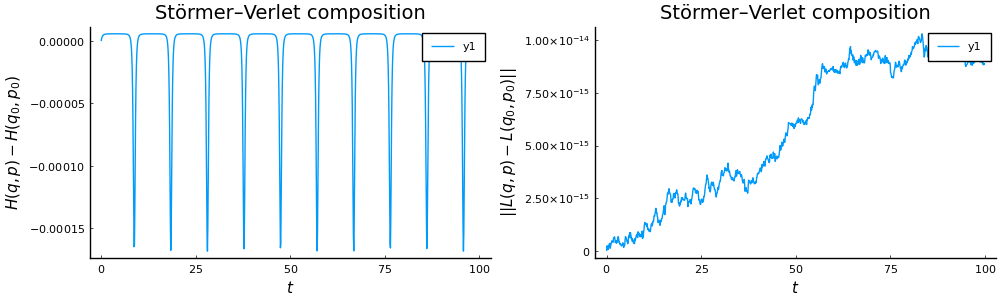

In [381]:
gr(size=(1000,300)); pyplot()



H7=[H(q7[i,:],p7[i,:]) for i in 1:N+1]

L7=[L(q7[i,:],p7[i,:]) for i in 1:N+1]

errL7 = [norm(L7[i]-L7[1]) for i in 1:N+1]

plot1 = plot(t7, H7 .- H7[1], xlabel = L"t", ylabel = L"H(q,p)-H(q_0,p_0)")
plot2 = plot(t7, errL7 ,xlabel = L"t", ylabel = L"||L(q,p)-L(q_0,p_0)||")


plot(plot1,plot2, layout =(1, 2),title="Störmer–Verlet composition") #plot_title="RK4"